# **1. Descriptive Statistics**


Loaded the dataset (Lung Cancer Dataset.csv).

* Loaded the dataset (Lung Cancer Dataset.csv).

* Displayed dataset information (df.info()).

* Summarized statistical properties (df.describe()).

* Identified categorical and numerical variables.

The queestion we will be working is:
"How do characteristics like smoking history, age, gender, and pre-existing pulmonary diseases influence the likelihood of developing lung cancer?"









In [32]:
#reading the data
import pandas as pd
import numpy as np
# Load the CSV file
df = pd.read_csv("Lung Cancer Dataset.csv")
# Display the first few rows
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [31]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          50

In [33]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               AGE       GENDER      SMOKING  FINGER_DISCOLORATION  \
count  5000.000000  5000.000000  5000.000000             5000.0000   
mean     57.222800     0.501200     0.666400                0.6012   
std      15.799224     0.500049     0.471546                0.4897   
min      30.000000     0.000000     0.000000                0.0000   
25%      44.000000     0.000000     0.000000                0.0000   
50%      57.000000     1.000000     1.000000                1.0000   
75%      71.000000     1.000000     1.000000                1.0000   
max      84.000000     1.000000     1.000000                1.0000   

       MENTAL_STRESS  EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  \
count    5000.000000            5000.000000        5000.000000   5000.000000   
mean        0.539800               0.516000           0.439200     55.032043   
std         0.498463               0.499794           0.496339      7.913083   
min         0.000000        

In [34]:
#lets identify the categorical and numerical varibles
numeric_var = df.select_dtypes(include = ["object", "category"]).columns
categorical_var = df.select_dtypes(include = ['int64','float64'] ).columns
print("Categorical columns are:",list(categorical_var))
print("\nNumerical columns are:",list(numeric_var))

Categorical columns are: ['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS', 'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL', 'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION', 'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS', 'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE']

Numerical columns are: ['PULMONARY_DISEASE']


In [35]:
#Finding the mssing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [36]:
import pandas as pd
# Load dataset
df = pd.read_csv("Lung Cancer Dataset.csv")

# Convert column to string to avoid errors
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].astype(str)

# Remove extra spaces and convert to uppercase
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].str.strip().str.upper()

# Replace any unexpected values (e.g., 'UNKNOWN', 'NAN') with NaN
df['PULMONARY_DISEASE'].replace(['UNKNOWN', 'NAN', 'nan'], pd.NA, inplace=True)

# Map YES/NO to 1/0
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

# Now safely fill missing values with the most common value
df['PULMONARY_DISEASE'].fillna(df['PULMONARY_DISEASE'].mode()[0], inplace=True)

# Convert to integer for consistency
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].astype(int)

# Check unique values
print("Unique values after mapping:", df['PULMONARY_DISEASE'].unique())

# Display first few rows
df


Unique values after mapping: [0 1]


<ipython-input-36-d135de67f408>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PULMONARY_DISEASE'].replace(['UNKNOWN', 'NAN', 'nan'], pd.NA, inplace=True)
<ipython-input-36-d135de67f408>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,1
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,1
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,0
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,0


# **2. Exploratory Data Analysis (EDA)**

Checked for missing values.

Visualized distributions using histograms.

Used boxplots to detect outliers in numerical features.

Created a correlation matrix heatmap to analyze relationships between variables.



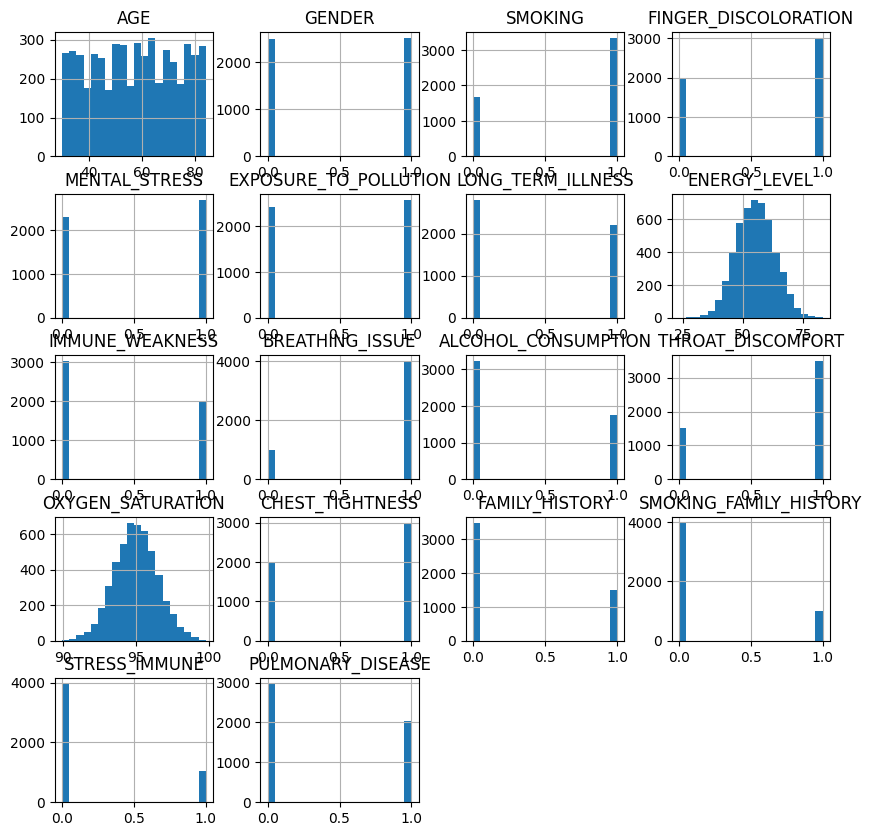

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of numerical variables
df.hist(figsize=(10, 10), bins=20)
plt.show()


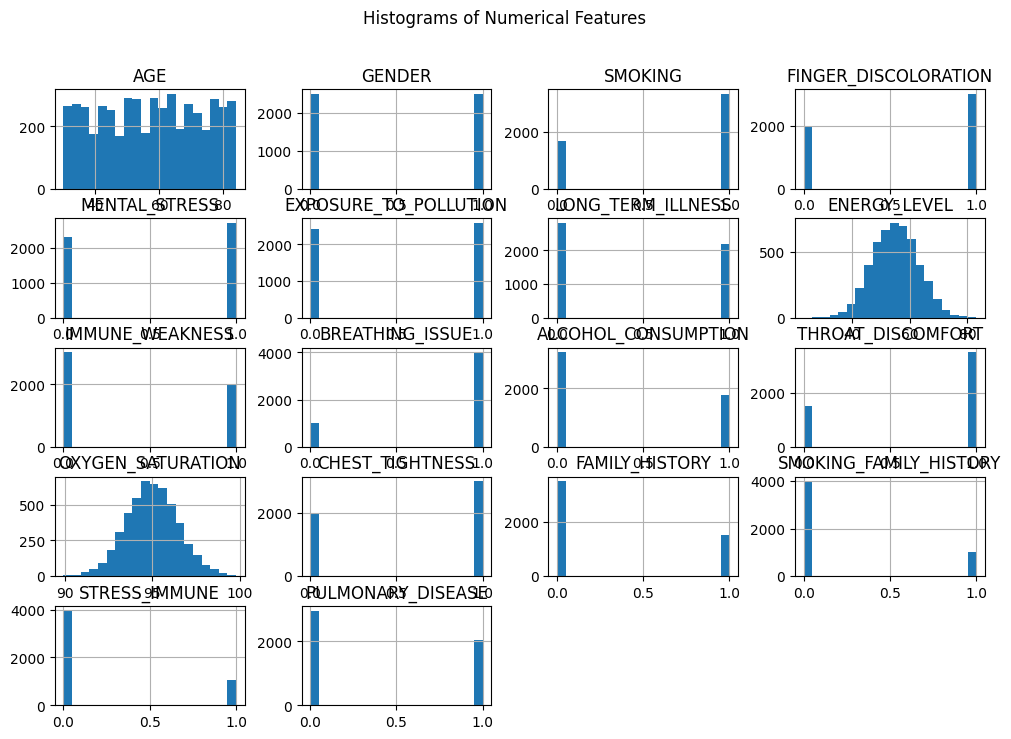

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

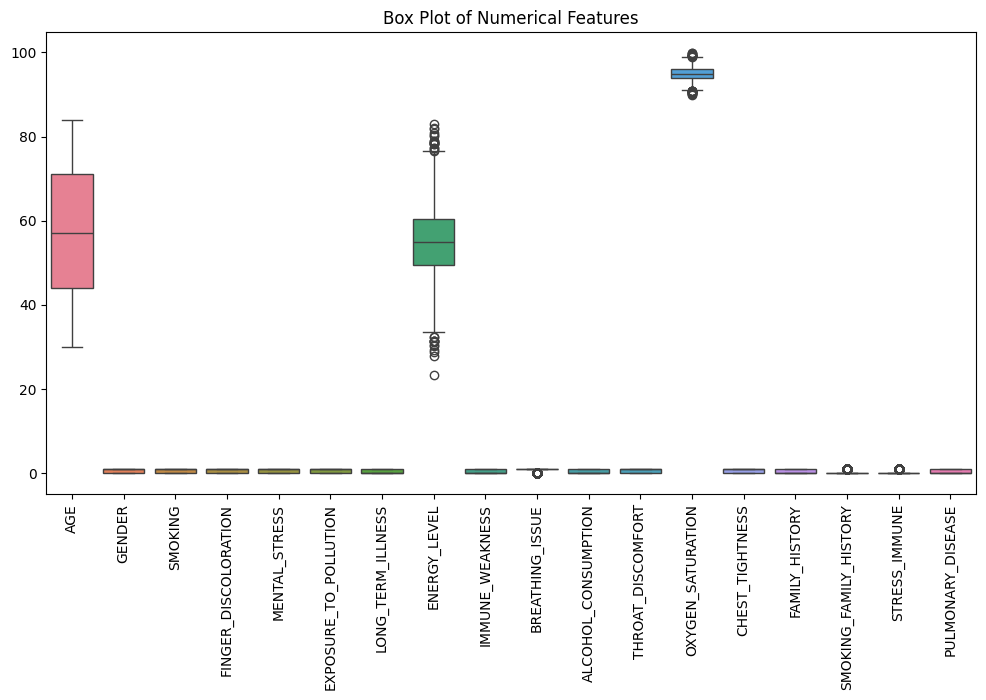

In [39]:
# Boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features")
plt.show()

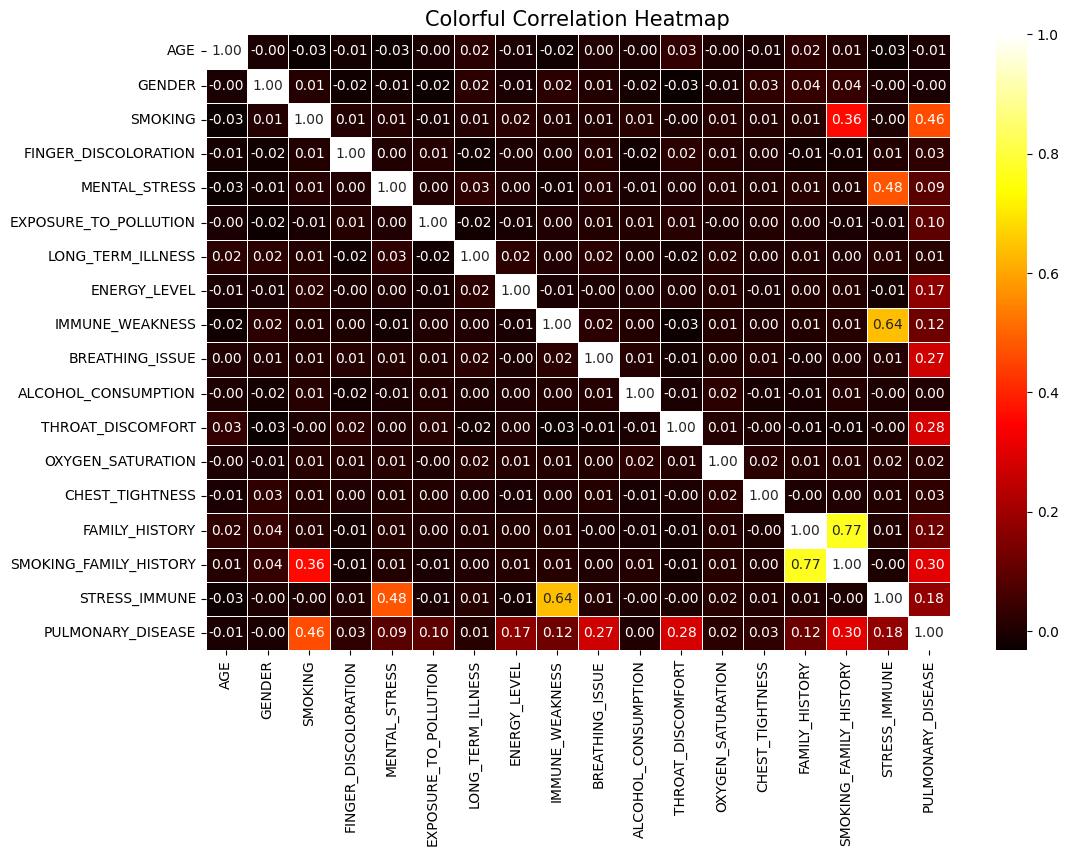

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# making  the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='hot', fmt=".2f", linewidths=0.5)
plt.title("Colorful Correlation Heatmap", fontsize=15)
# Show the plot
plt.show()

In [23]:
# formal modelling
# defining features (X) and target varible (Y)

X = df.drop(columns=['PULMONARY_DISEASE']) #drop target column
Y = df['PULMONARY_DISEASE']

In [24]:
from sklearn.preprocessing import LabelEncoder
# Apply Label Encoding to categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [25]:
#train-test split training into 80% and testing into 20%
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)


In [26]:
# train a machine learning model
from sklearn.linear_model import LogisticRegression

# train logistic model
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.894
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       571
           1       0.85      0.91      0.88       429

    accuracy                           0.89      1000
   macro avg       0.89      0.90      0.89      1000
weighted avg       0.90      0.89      0.89      1000



# **Model evaluation and performance assessment**
A logistic regression model was trained on a lung cancer dataset, and its performance was evaluated using key classification metrics.

1. Accuracy
The model has attained an accuracy of 89.4%, meaning it successfully predicted lung cancer presence or absence in 894 out of 1000 test cases. This shows that the model is performing reasonably well, although there is definitely scope for improvement.

2. Precision, Recall, and F1-Score
Class 0 (No Lung Cancer):
Precision: 0.93 → When predicting no lung cancer, it is correct 93% of the time.

Recall: 0.88 → It correctly identifies 88% of actual non-cancer cases.

F1-Score: 0.91 → This is a balanced measure of precision and recall.

Class 1 (Lung Cancer Present):
Precision: 0.85 → When predicting lung cancer, it is correct 85% of the time.

Recall: 0.91 → It correctly identifies 91% of actual lung cancer cases.

F1-Score: 0.88 → This indicates a strong performance for the positive cases.

3. Macro and Weighted Averages
Macro Avg.: 0.89 (averaging precision, recall, and F1 across both classes).

Weighted Avg.: 0.90 (considering the class imbalance).

4. Interpretation
Class 0, non-cancer cases, has relatively high precision when compared to Class 1, lung cancer cases. Thus, the model is better at distinguishing non-cancer cases than cancer ones.

The recall for Class 1 is immense (91%); this tells that in almost all the lung cancer cases, the model does its best to pick it up, which is crucial in the context of medical diagnosis.

There is a slight dip in precision for Class 1 (85%); this means some false positives exist, which may need to be tuned further.

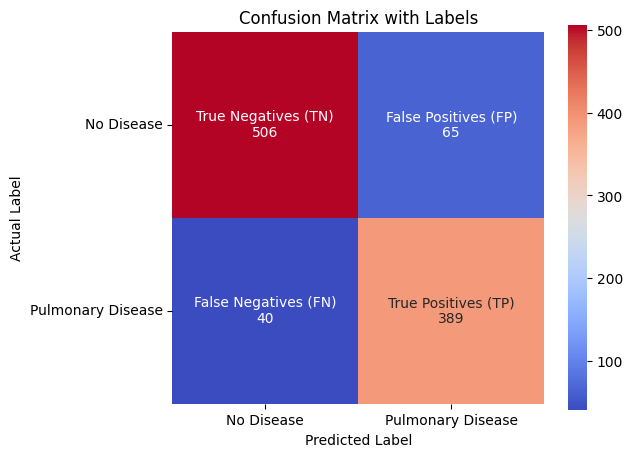

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example confusion matrix values
cm = np.array([[506, 65], [40, 389]])

# Define class labels
labels = np.array([["True Negatives (TN)\n506", "False Positives (FP)\n65"],
                   ["False Negatives (FN)\n40", "True Positives (TP)\n389"]])

# Create heatmap with annotations
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm', cbar=True, square=True)

# Add axis labels
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.xticks(ticks=[0.5, 1.5], labels=["No Disease", "Pulmonary Disease"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Disease", "Pulmonary Disease"], rotation=0)
plt.title("Confusion Matrix with Labels")

# Show plot
plt.show()
